In [ ]:
import pandas as pd
import numpy as np 
import sqlite3
import re
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA/BAAD16DATASET")
!ls

Dataset1.csv  Dataset2.csv


In [ ]:
data = pd.read_csv('Dataset1.csv',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.shape

(14374, 3)

In [ ]:
final = data.drop_duplicates(subset={"label","text"},keep='first',inplace=False)
final.shape

(14374, 3)

In [ ]:
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")

In [ ]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

In [ ]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word1 in cleanhtml(w).split():
                for cleaned_word in clean_punct(cleaned_word1).split():
                    if len(cleaned_word)>2:
                        if(to_encode(cleaned_word) not in set_stop):
                            s = stemmer.stem_word(cleaned_word)
                            if len(s)>2:
                                final_words.append(s)
                                filtered_sentence.append(s)
                        else:
                            continue
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X_train = pre_process(final['text'].values)
y_train = final['label'].values

In [ ]:
data1 = pd.read_csv('Dataset2.csv')

In [ ]:
data1.shape

(3592, 3)

In [ ]:
final1=data1.drop_duplicates(subset={"label","text"},keep='first',inplace=False)
final1.shape

(3592, 3)

In [ ]:
X_test = pre_process(final1['text'].values)
y_test = final1['label'].values

In [ ]:
labels=np.unique(y_train)

In [ ]:
labels

array(['MZI', 'bongkim', 'humayun_ahmed', 'manik_bandhopaddhay', 'nazrul',
       'nihar_ronjon_gupta', 'robindronath', 'shirshendu', 'shomresh',
       'shordindu', 'shorotchandra', 'shottojit_roy',
       'shunil_gongopaddhay', 'tarashonkor', 'toslima_nasrin',
       'zahir_rayhan'], dtype=object)

## **MULTINOMIAL NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn . model_selection import cross_val_score

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=.01)),
              ])
Gmodel = nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)


print("Cross val score:",cross_val_score(Gmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))


Cross val score: [0.95617391 0.95791304 0.96069565 0.95721739 0.95998608]
accuracy 0.9632516703786191
accuracy normalized 3460
                     precision    recall  f1-score   support

                MZI       0.99      0.77      0.87       220
            bongkim       0.99      0.96      0.97       112
      humayun_ahmed       0.92      1.00      0.96       906
manik_bandhopaddhay       0.99      0.86      0.92        93
             nazrul       1.00      0.89      0.94        44
 nihar_ronjon_gupta       1.00      0.96      0.98        95
       robindronath       0.98      0.98      0.98       252
         shirshendu       0.99      0.97      0.98       210
           shomresh       0.99      0.98      0.98       282
          shordindu       0.99      0.96      0.97       177
      shorotchandra       0.97      1.00      0.98       261
      shottojit_roy       1.00      0.97      0.98       169
shunil_gongopaddhay       0.96      0.98      0.97       393
        tarashonko

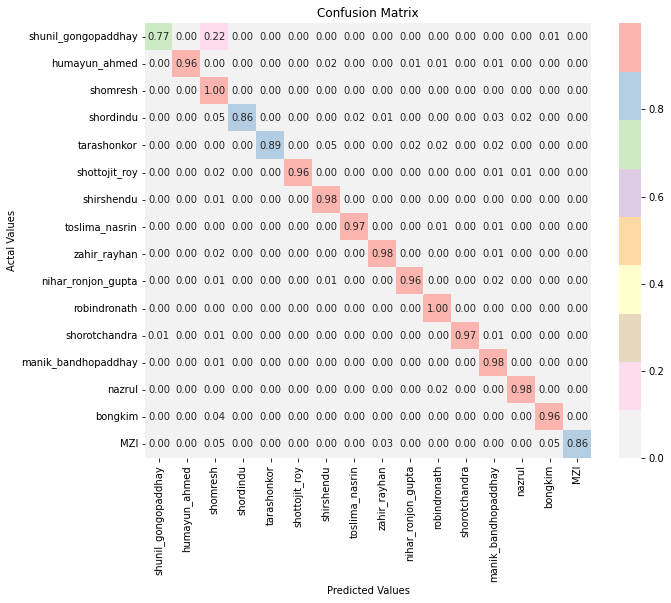

In [ ]:
# Naive BaYES Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **svm**

In [ ]:
from sklearn.linear_model import SGDClassifier
svm = Pipeline([('vect', CountVectorizer()), #pipeline works one after another
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=10000, tol=None)),
              ])
Gmodel=svm.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)

print("Cross val score:",cross_val_score(Gmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))

Cross val score: [0.92208696 0.9293913  0.92243478 0.92278261 0.927627  ]
accuracy 0.9287305122494433
accuracy normalized 3336
                     precision    recall  f1-score   support

                MZI       0.96      0.84      0.89       220
            bongkim       0.96      0.96      0.96       112
      humayun_ahmed       0.91      0.99      0.95       906
manik_bandhopaddhay       1.00      0.77      0.87        93
             nazrul       1.00      0.36      0.53        44
 nihar_ronjon_gupta       0.99      0.79      0.88        95
       robindronath       0.94      0.83      0.88       252
         shirshendu       0.95      0.94      0.94       210
           shomresh       0.95      0.99      0.97       282
          shordindu       0.94      0.91      0.93       177
      shorotchandra       0.87      0.99      0.93       261
      shottojit_roy       0.97      0.89      0.93       169
shunil_gongopaddhay       0.91      0.99      0.95       393
        tarashonko

In [ ]:
# SVM Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn . model_selection import cross_val_score

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression ( multi_class = 'ovr' , solver = 'lbfgs' )),
              ])
Gmodel=lr.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)

print("Cross val score:",cross_val_score(Gmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))



Cross val score: [0.95095652 0.95756522 0.9533913  0.94817391 0.95824635]
accuracy 0.9660356347438753
accuracy normalized 3470
                     precision    recall  f1-score   support

                MZI       0.96      0.93      0.95       220
            bongkim       0.99      0.97      0.98       112
      humayun_ahmed       0.96      0.99      0.97       906
manik_bandhopaddhay       0.99      0.94      0.96        93
             nazrul       1.00      0.64      0.78        44
 nihar_ronjon_gupta       0.99      0.93      0.96        95
       robindronath       0.94      0.97      0.95       252
         shirshendu       0.99      0.97      0.98       210
           shomresh       0.98      0.99      0.99       282
          shordindu       0.99      0.94      0.96       177
      shorotchandra       0.97      0.98      0.97       261
      shottojit_roy       0.98      0.96      0.97       169
shunil_gongopaddhay       0.95      0.99      0.97       393
        tarashonko

In [ ]:
# lOGISTIC Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn . model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier ( n_estimators=100 )

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier ( n_estimators=100 )),
              ])
Rmodel=lr.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)

print("Cross val score:",cross_val_score(Rmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))



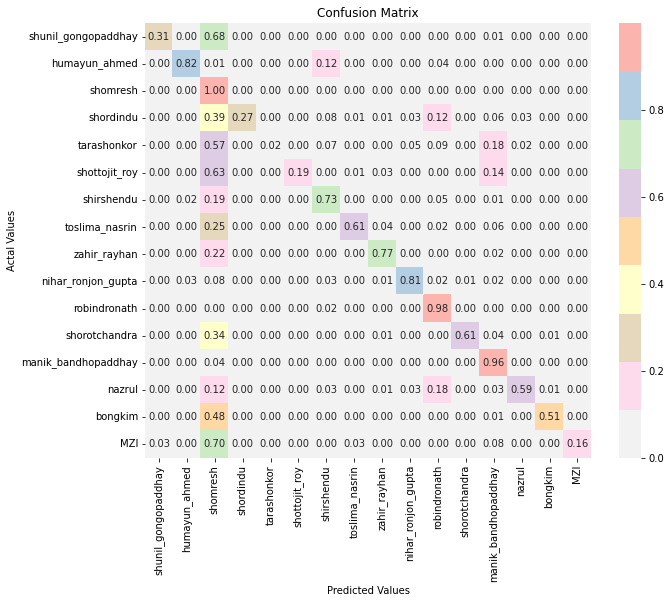

In [ ]:
# random forest Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()